**What is Feature Selection?**
 
        Feature selection is the process of choosing the most important features (variables) from a dataset to improve a machine learning model's performance and efficiency. Instead of using all the features, we select only the most relevant ones that contribute significantly to predictions.

**Why Do We Need Feature Selection?**
 
*<b>1.Reduces Overfitting 📉*</b>
 
        Too many irrelevant features can make a model complex and cause it to overfit the training data.

*<b>2.Improves Model Performance 🚀*</b>
 
        Selecting relevant features boosts accuracy and reduces unnecessary noise in the data.

*<b>3.Reduces Training Time ⏳*</b>
 
        Fewer features mean faster model training and lower computational cost.

*<b>4.Enhances Interpretability 🔍*</b>
 
        Helps in understanding which features actually impact predictions.

 

**Types of Feature Selection Methods**
 
**<ins>Type => Filter Methods:</ins>**
 
Method => Correlation, Chi-Square, Mutual Information.
 
Description => Rank features based on statistical tests.
 
**<ins>Type => Wrapper Methods:</ins>**
 
Method => Forward/Backward Selection, Recursive Feature Elimination (RFE)
 
Description => Train models with different feature subsets and select the best.

**<ins>Type => Embedded Methods</ins>**
 
Method =>Lasso Regression, Decision Trees
 
Description =>Feature selection is built into the model training process.
 

In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
# Step 1: Create a smaple Dataset
np.random.seed(42)
data = pd.DataFrame({
    'Size': np.random.randint(1000,5000,100), #Square feet
    'Bedrooms':np.random.randint(1,5,100),    # Number of bedrooms
    'Age':np.random.randint(1,50,100),        # Age of the house
    'Price':np.random.randint(100000,500000,100)  # House price
})

In [22]:
data.head()

,Size,Bedrooms,Age,Price
0,4174,2,32,486393
1,4507,2,39,134754
2,1860,4,49,326814
3,2294,2,32,337714
4,2130,2,4,242483


In [24]:
data.tail()

,Size,Bedrooms,Age,Price
95,2129,2,16,469599
96,4843,4,29,236672
97,4893,1,3,325732
98,2500,3,20,455323
99,1702,3,36,271836


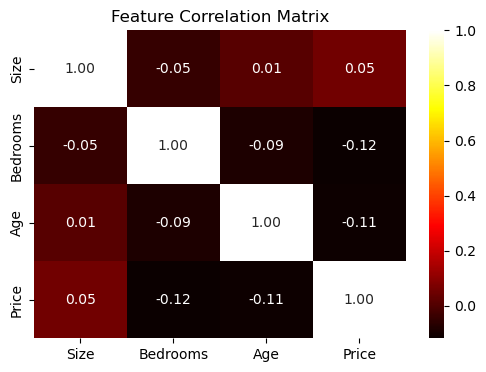

In [38]:
# Step 2: Compute Correlation (Filter Method)
plt.figure(figsize=(6,4))
sns.heatmap(data.corr(),annot=True, cmap='hot',fmt='.2f')
plt.title("Feature Correlation Matrix")
plt.show()
#Compute correlation to see how features relate to the target

In [51]:
# Step 3 : Apply Recursive Feature Elimination (Wrapper Method)
X = data.drop(columns=['Price']) #Feature
y = data['Price'] # Target variable

model = RandomForestRegressor()
rfe = RFE(model,n_features_to_select=2) #Select top 2 features
X_selected = rfe.fit_transform(X,y)

print("Selected Features using REF:",X.columns[rfe.support_])

#Apply RFE (Wrapper Method) to select the top 2 important features

Selected Features using REF: Index(['Size', 'Age'], dtype='object')


In [55]:
#Step 4: Apply Lasso(Least Abosulte Shrinkage and selection operator) Regression(Embedded method)
lasso = Lasso(alpha=0.1)
lasso.fit(X,y)
importance = np.abs(lasso.coef_)

#Display Feature Importance
selected_features = X.columns[importance > 0]
print("selected features using lasso:",selected_features)

#Apply Lasso Regression(Embedded method) to eliminate irrelevant features


selected features using lasso: Index(['Size', 'Bedrooms', 'Age'], dtype='object')
